# Likert Scale Data Exploration and Analysis
Author: Jiawen Zhu

## Set-Up

### Import Packages

In [2]:
import math

# data storage and wrangling
import numpy as np
import pandas as pd

# visualization
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns

# statistics
import scipy

### Set Random Seed
- Ensures consistency if probabilistic methods are used.

In [122]:
np.random.seed(0)

## Data Preparation

### Import Data
- data is given as a comma separated file
- `data.csv` as placeholder file name

#### V1: Using `numpy`
- `rb` option is for **r**ead as **b**inary
- `delimiter = ","` since data is given as a **comma** separated file
- `dtype = str` means all values are interpreted as a string (everything must share the same data type)
- output `data` is an array of arrays: `array(row0, row1, ...)`
  - `row0` is typically the header row
  - each of `row1, row2, ...` corresponds to a data point
- the data is more raw and operations are more efficient, but implementing complex manipulations may be tedious

In [123]:
data = np.loadtxt(open("data.csv", "rb"), dtype = str, delimiter=",")

#### V2: Using `pandas`
- output `dataframe` is a data frame, a tabular data structure
- data frames
  - allow values to be of different data types
  - facilitate labeled indexing (refer to rows/columns using names vs. numbers)
  - provide many high-level data manipulations for straighforward implementation
- though data frames computations are slower, they are generally preferred for our purposes

In [124]:
dataframe = pd.read_csv("data.csv")

### Clean Data
- Ensure validity of data
  - Did you import everything correctly?
    - Is all data present?
      - E.g. Count number of data points using `len()`
    - For paired data, are all pairs present and correct?
      - E.g. Check number of `cond1` data points and `cond2` data points are equal
      - E.g. For within subjects studies, check for every participant ID, there is one `cond1` data point and one `cond2` data point
  - Is there missing data?
    - E.g. Compare row lengths and column lengths
    - If data is missing
      - Contact participant to fill in missing data, if still possible
      - Make sure your analysis, such as statistica tests, takes this into account
- Manipulate data so that it is easier to handle later
  - E.g. map row/column names to numerical indices or shorter strings
  - E.g. replace string values with numerical labels
  - E.g. cluster measures by category (for example, SUS and self-defined can be separated to allow separate analysis)

#### Replace data values with something else

In [125]:
dictMap = {"Condition 1" : 1, "Condition 2" : 2}
dataframe = dataframe.replace(dictMap)

#### Map row/column names to something else

In [132]:
# map header row from string to index
header = dataframe.columns.tolist()
indices = list(range(0, len(header)))
idxToHeader = dict(zip(indices, header))
headerToIdx = dict(zip(header, indices))

# rename header row (if wanted)
dataframe.columns = indices

#### Cluster measures by category

In [134]:
## using the UMUX-Lite scale as an example

# create category by specifying which columns/indices to include
umux = ["This system's capabilities meet my requirements.", "This system is easy to use."]
umuxIdx = [headerToIdx[i] for i in umux]

condition = "Condition"
conditionIdx = headerToIdx[condition]

# using created category
dataframe[umuxIdx] # or dataframe[umux] if header row NOT renamed

In [ ]:
## example of how to use clusters
# df is the entire dataframe

# get data
idx = [conditionIdx] + umuxIdx
umuxDf = df[idx]

# split data by condition
umuxDf_cond = umuxDf.groupby(umuxDf[conditionIdx] == 1)
umuxBaseline = umuxDf_cond.get_group(True)
umuxSystem = umuxDf_cond.get_group(False)

## Data Exploration
- the code provided here is for paired ordinal (Likert-type) data collected in within subject studies with two conditions
- this code can easily be adapted
  - for unpaired ordinal data (between subject studies), by using `scipy.stats.mannwhitneyu` instead of `scipy.stats.wilcoxon`
  - for studies with 1 condition only, pass the same data twice to plotting functions and ignore the statistical tests (this is for exploration purposes only)
- to adapt to other scenarios, the code would require more modification

### Goals of Data Exploration
- in initial exploration stages, we often want to see the full distribution of data
- we also care about
  - summary statistics
    - measures of central tendency: median, mean, mode
    - measures of variance: standard deviation, variance, IQR, range
    - others: maximum, minimum, Q1 (1st quartile), Q3
  - statistical tests
    - often: given 2 populations (2 conditions), is there a *significant* difference between the two
    - statistical significance: p-value
    - practical significance: effect size

Note: remember that Likert scales typically start at 1, meaning that the y-axis of plots should also start at 1 (rather than 0, as is usually the default)

### Individual Item
- distribution
- mean
- median
- standard deviation
- Wilcoxon Signed-Rank Test
  - p-value
  - test statistics
  - effect size

Note: For the effect size, there is debate on whether we should divide by $\sqrt{n}$ or $\sqrt{N} = \sqrt{2n}$, where $n$ is the number of units in each group/condition, and $N$ is the total number of sampled units. Typically the difference between the two variations should be negligible, though $\sqrt{N}$ is the more conservative choice. I used $\sqrt{n}$ here.

--- MEAN --- 
Condition 1: 3.0 
Condition 2: 3.8
--- MEDIAN --- 
Condition 1: 3.0 
Condition 2: 4.0
--- STANDARD DEVIATION --- 
Condition 1: 0.6324555320336759 
Condition 2: 2.1354156504062622
--- Wilcoxon Rank Sum ---
p-value: 0.49624247444426295 ; test statistics: 5.0
effect size: -0.30429030972509225


/Users/jiawenz/Library/Python/3.9/lib/python/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


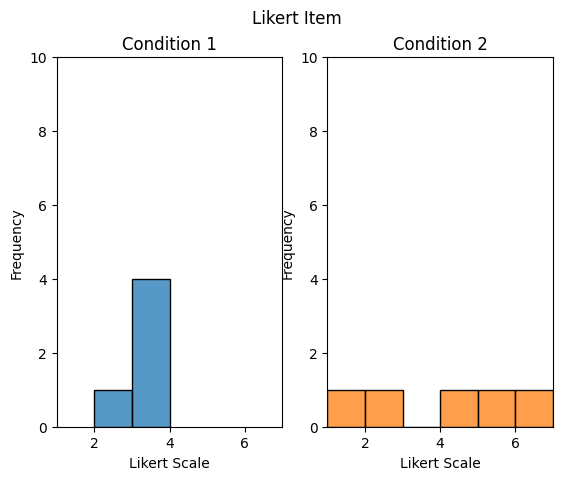

In [5]:
# data1, data2: list-like objects
# name1, name2: names for data1, data2, usually the condition name
# title: name for the entire plot, usually (shortened) Likert scale item
# xlab, ylab: label for x-axis, y-axis
# min, max: range of {data1, data2}, usually the min and max of the Likert scale
# ymax: max of the y-axis (for frequency), default is 10
# palette: colour palette

def exploreData(data1, data2, name1 = "Condition 1", name2 = "Condition 2", title = "Likert Item",
                xlab = "Likert Scale", ylab = "Frequency", min = 1, max = 7, ymax = 10, palette = sns.color_palette()):

    # print summary statistics
    print("--- MEAN ---", "\n"+name1+":", np.mean(data1), "\n"+name2+":", np.mean(data2))
    print("--- MEDIAN ---", "\n"+name1+":", np.median(data1), "\n"+name2+":", np.median(data2))
    print("--- STANDARD DEVIATION ---", "\n"+name1+":", np.std(data1),"\n"+name2+":", np.std(data2))

    # print statistical test results
    test = scipy.stats.wilcoxon(data1, data2, zero_method="zsplit", method="approx", alternative="two-sided")
    print("--- Wilcoxon Rank Sum ---")
    print("p-value:", test.pvalue, "; test statistics:", test.statistic)
    print("effect size:", test.zstatistic / np.sqrt(len(data1))) # paired data => len(data1) = len(data2)
    
    # plot distributions
    fig, ax = plt.subplots(1, 2)

    sns.histplot(data1, ax = ax[0], color=palette[0], binwidth=1)
    ax[0].set(xlabel=xlab, ylabel=ylab, title=name1, xlim=(min, max), ylim=(0,ymax))
    sns.histplot(data2, ax = ax[1], color=palette[1], binwidth=1)
    ax[1].set(xlabel=xlab, ylabel=ylab, title=name2, xlim=(min, max), ylim=(0,ymax))

    fig.suptitle(title)

# example
exploreData([3,4,3,3,2],[7,2,5,4,1])
# exploreData(dataframe[idx1], dataframe[idx2])

### Overview of Distributions

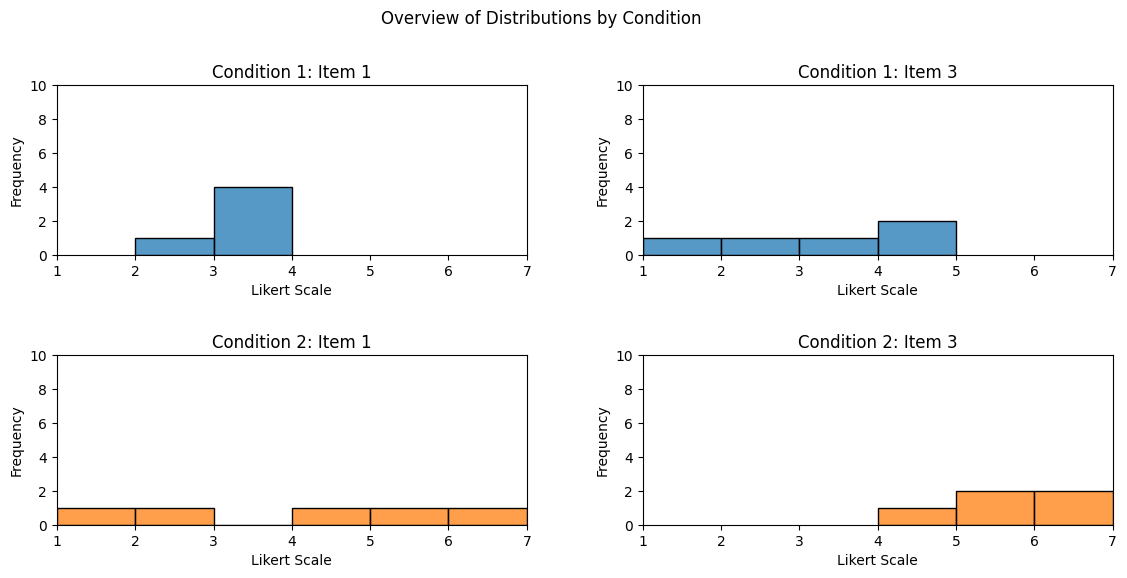

In [3]:
# data1, data2: list of lists -> [lst1, lst2, ..., lst_k]
# idx: list of indices (between 0 and k-1) to select the lists from data1, data2 which we want to compare
# items: names for all lists/items, len(items) = k
# name1, name2: names for data1, data2, usually the condition name
# title: name for the entire plot, usually the category of Likert items
# xlab, ylab: label for x-axis, y-axis
# min, max: range of {data1, data2}, usually the min and max of the Likert scale
# ymax: max of the y-axis (for frequency), default is 10
# palette: colour palette

def aggregateData_distro(data1, data2, idx, items, name1 = "Condition 1", name2 = "Condition 2", title = "Overview of Distributions by Condition",
                         xlab = "Likert Scale", ylab = "Frequency", min = 1, max = 7, ymax = 10, palette = sns.color_palette()):
    # initialize figure
    fig_per_row = len(idx)
    fig, ax = plt.subplots(2, fig_per_row)

    for j in range (0, fig_per_row):
        sns.histplot(data1[idx[j]], ax = ax[0, j], binwidth = 1, color=palette[0])
        sns.histplot(data2[idx[j]], ax = ax[1, j], binwidth = 1, color=palette[1])
        ax[0, j].set(xlabel=xlab, ylabel=ylab, title= name1 + ": " + items[idx[j]], xlim=(min, max), ylim=(0, ymax))
        ax[1, j].set(xlabel=xlab, ylabel=ylab, title= name2 + ": " + items[idx[j]], xlim=(min, max), ylim=(0, ymax))


    fig.suptitle(title)
    fig.tight_layout()

    fig.set_size_inches(12, 6)

# example
data1 = [[3,4,3,3,2],
         [1,1,1,2,2],
         [2,4,3,1,5]]
data2 = [[7,2,5,4,1],
         [7,6,3,1,1],
         [5,5,6,4,7]]
aggregateData_distro(data1, data2, idx = [0, 2], items = ["Item 1", "Item 2", "Item 3"])

### Overview of Summary Statistics

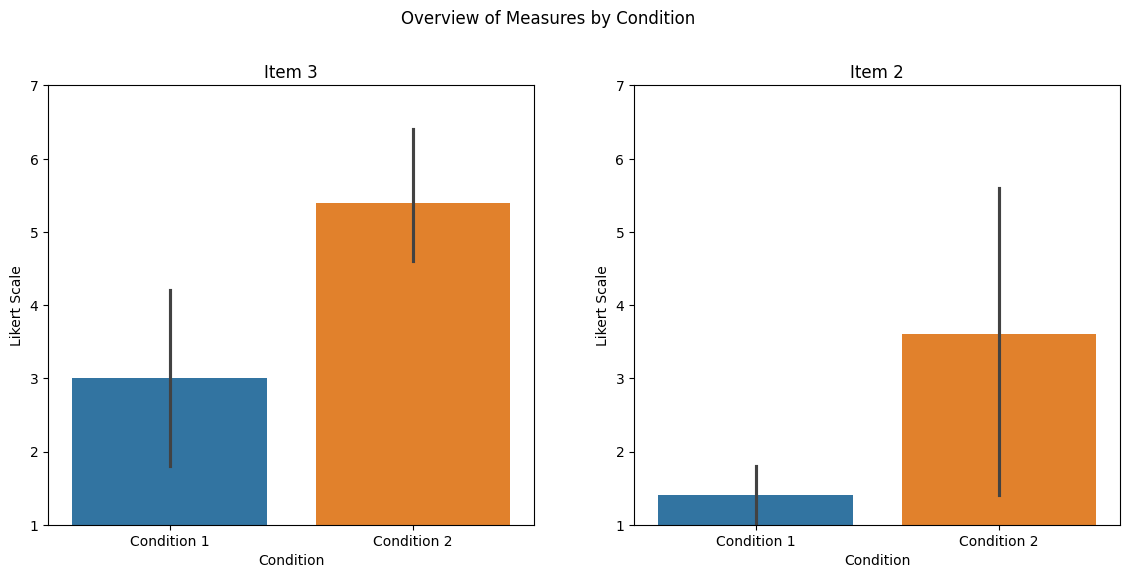

In [4]:
# data1, data2: list of lists -> [lst1, lst2, ..., lst_k]
# idx: list of indices (between 0 and k-1) to select the lists from data1, data2 which we want to compare
# items: names for all lists/items, len(items) = k
# func: summary statistics to calculate, usually a measure of central tendency such as mean or median
# name1, name2: names for data1, data2, usually the condition name
# title: name for the entire plot, usually the category of Likert items
# xlab, ylab: label for x-axis, y-axis
# min, max: range of {data1, data2}, usually the min and max of the Likert scale
# palette: colour palette

def aggregateData_summary(data1, data2, idx, items, func = np.mean, name1 = "Condition 1", name2 = "Condition 2", title = "Overview of Measures by Condition",
                         xlab = "Condition", ylab = "Likert Scale", min = 1, max = 7, palette = sns.color_palette()):
    # initialize figure
    fig_per_row = len(idx)
    fig, ax = plt.subplots(1, fig_per_row)

    for j in range (0, fig_per_row):
        sns.barplot([data1[idx[j]], data2[idx[j]]], ax = ax[j], estimator=func, palette=palette[0:2])
        ax[j].set(xlabel=xlab, ylabel=ylab, title=items[idx[j]], ylim=(min, max))
        ax[j].xaxis.set_ticks([0,1])
        ax[j].set_xticklabels([name1, name2])

    fig.suptitle(title)
    fig.tight_layout()

    fig.set_size_inches(12, 6)

# example
data1 = [[3,4,3,3,2],
         [1,1,1,2,2],
         [2,4,3,1,5]]
data2 = [[7,2,5,4,1],
         [7,6,3,1,1],
         [5,5,6,4,7]]
aggregateData_summary(data1, data2, idx = [2, 1], items = ["Item 1", "Item 2", "Item 3"])

## TODO: Data Presentation